In [1]:
import enum

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.neighbors
import seaborn as sns

In [2]:
male_df = pd.read_csv('C:\School\BigData\Big_Data\male.csv')
trimmed_male_data = male_df[['stature']]

In [3]:
male_df = pd.read_csv('C:/School/BigData/Big_Data/male.csv')
male_trimmed_data = male_df[['stature', 'weightkg', 'chestbreadth', 'waistbreadth', 'hipbreadth', 'waistcircumference', 'crotchheight', 'footlength', 'Ethnicity']]

female_df = pd.read_csv("C:/School/BigData/Big_Data/female.csv")
female_trimmed_data = female_df[['stature', 'weightkg', 'chestbreadth', 'waistbreadth', 'hipbreadth', 'waistcircumference', 'crotchheight', 'footlength', 'Ethnicity']]

male_trimmed_data.to_csv('clean_male')
female_trimmed_data.to_csv('clean_female')
#male_df.head()
male_trimmed_data.tail()

,stature,weightkg,chestbreadth,waistbreadth,hipbreadth,waistcircumference,crotchheight,footlength,Ethnicity
4077,1688,675,266,279,301,816,807,255,Blackfoot Cherokee Choctaw
4078,1765,896,323,351,356,978,848,263,NaN
4079,1690,832,290,333,334,991,787,263,NaN
4080,1718,731,284,293,320,783,846,266,NaN
4081,1828,985,308,354,339,1080,931,295,NaN


In [4]:
#weight_height_male = trimmed_male_data['stature', 'weightkg']
weight_height_male_df = pd.read_csv('C:\School\BigData\Big_Data\male.csv', usecols=['stature', 'weightkg'])
weight_height_male_df.rename(columns={'weightkg':'Kg', 'stature':'Cm'}, inplace=True)
weight_height_male_df['Kg'] = weight_height_male_df['Kg'].multiply(0.1)
weight_height_male_df['Cm'] = weight_height_male_df['Cm'].multiply(0.1)

small_df = weight_height_male_df.head(10)
small_df.head(15)

,Cm,Kg
0,177.6,81.5
1,170.2,72.6
2,173.5,92.9
3,165.5,79.4
4,191.4,94.6
5,172.0,80.2
6,181.0,116.2
7,185.0,95.4
8,177.7,99.5
9,181.1,70.2


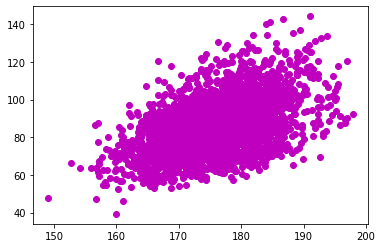

In [5]:
#matplotlib.pyplot.subplot
#weight_height_male_df.plot(x='Kg', y='Cm', kind='scatter')
small_df = weight_height_male_df.head(3000)
#small_df.head(15)
#small_df.plot(x='Kg', y='Cm',)

height = []
weight = []

for row in small_df.itertuples():
    ones_height = row[1]
    ones_weight = row[2]
    height.append(ones_height)
    weight.append(ones_weight)

#'r = color, o = dots'
#We can set this value with each persons.size val

colors = ['go', 'yo', 'co', 'bo', 'ro', 'po', 'mo']
plt.plot(height, weight, 'mo')
plt.show()

In [6]:
weight_height_male_df['Kg'].min()
#.round(decimal=1)

39.300000000000004

In [7]:
class Size:
    xs = "XSMALL"
    s = "SMALL"
    m = "MEDIUM"
    l = "LARGE"
    xl = "XLARGE"
    xxl = "XXLARGE"
    xxxl = "XXXLARGE"


class Person:
    def __init__(self, weight, height, *args):
        self.weight = weight
        self.height = height

        #self.chestbreadth = args.chestbreadth
        #self.waistbreadth = args.waistbreadth
        #self.hipbreadth = args.hipbreadth

        self.size = Size.xs if (height <= 169) & (weight <= 55) else Size.s if (height <= 178) & (weight <= 65) else Size.m if (height <= 182) & (weight <= 75) else Size.l if (height <= 186) & (weight <= 85) else Size.xl if (height <= 190) & (weight <= 90) else Size.xxl if (height <= 194) & (weight <= 95) else Size.xxxl


In [8]:
people = []
weight_height_male_df['Size'] = ''
for row in weight_height_male_df.itertuples():
    height = row[1]
    weight = row[2]
    person = Person(weight, height)
    people.append(person)

In [9]:
#weight_height_male_df

In [10]:
people[4].size

'XXLARGE'

In [11]:
everyones_size = []
for person in people:
    everyones_size.append(person.size)

weight_height_male_df['Size'] = everyones_size

In [12]:
weight_height_male_df.head()
small_df = weight_height_male_df.head(10)
small_df.head(10)

,Cm,Kg,Size
0,177.6,81.5,LARGE
1,170.2,72.6,MEDIUM
2,173.5,92.9,XXLARGE
3,165.5,79.4,LARGE
4,191.4,94.6,XXLARGE
5,172.0,80.2,LARGE
6,181.0,116.2,XXXLARGE
7,185.0,95.4,XXXLARGE
8,177.7,99.5,XXXLARGE
9,181.1,70.2,MEDIUM


In [13]:
from sklearn.neighbors import NearestNeighbors

arr_of_ars_of_measurements = []
for person in people:
    measurements = [person.weight, person.height]
    arr_of_ars_of_measurements.append(measurements)

#https://scikit-learn.org/stable/modules/neighbors.html#classification
# 1.6.1. Unsupervised Nearest Neighbors
# x =  arr_of_ars_of_measurements

neighbours = NearestNeighbors(n_neighbors=3, radius=0.2).fit(arr_of_ars_of_measurements)
distances, indices = neighbours.kneighbors(arr_of_ars_of_measurements)

print(distances)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
#print(indices)

[[0.         0.         0.1       ]
 [0.         0.1        0.2       ]
 [0.         0.36055513 0.5       ]
 ...
 [0.         0.31622777 0.4472136 ]
 [0.         0.2236068  0.4       ]
 [0.         0.2236068  0.60827625]]
~~~~~~~~~~~~~~~~~~~~~~~~~~


In [14]:
from sklearn.neighbors import KNeighborsClassifier

KN_Classifier = KNeighborsClassifier(n_neighbors=3)

values = []
sizes  = []

for person in people:
    print(person.weight)
    print(person.height)
    kg_and_cm = [round(person.weight,3), round(person.height, 3)]
    values.append(kg_and_cm)
    sizes.append(person.size)


reshaped_measurements = np.array(values).reshape(-1, 2)
#reshaped_measurements[person][0 = weight, 1 = height]
#one_one = reshaped_measurements[1][1]
KN_Classifier.fit(reshaped_measurements, sizes)

min_vikt = [[60, 176]]
prediction_size = KN_Classifier.predict(min_vikt)
probability = KN_Classifier.predict_proba(min_vikt)
score = KN_Classifier.score

81.5
177.60000000000002
72.60000000000001
170.20000000000002
92.9
173.5
79.4
165.5
94.60000000000001
191.4
80.2
172.0
116.2
181.0
95.4
185.0
99.5
177.70000000000002
70.2
181.10000000000002
88.2
178.0
70.10000000000001
173.3
103.7
181.4
111.60000000000001
186.10000000000002
89.60000000000001
170.9
92.4
174.0
77.9
169.4
96.9
176.60000000000002
76.0
174.8
90.80000000000001
179.4
71.4
178.0
74.60000000000001
168.0
79.2
165.3
91.5
195.9
96.5
175.5
67.5
163.0
107.30000000000001
182.5
79.30000000000001
179.5
78.2
174.5
88.2
181.8
71.5
188.10000000000002
94.7
176.0
66.5
167.5
87.9
185.20000000000002
67.5
178.5
88.4
179.10000000000002
69.5
168.5
121.80000000000001
185.0
71.9
173.70000000000002
88.10000000000001
174.3
57.5
174.4
87.60000000000001
167.9
85.0
183.60000000000002
86.5
173.0
95.80000000000001
176.20000000000002
66.7
166.9
70.60000000000001
174.0
84.7
170.9
101.30000000000001
187.9
85.60000000000001
167.4
109.5
177.9
83.4
184.4
72.7
163.70000000000002
98.60000000000001
175.4
77.300000

In [15]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Predicted Size: ' + str(prediction_size))
print()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Probability: ')
print('xs|~~~~~~~|s|~~~~~~~|m|~~~~~~~|l|~~~~~~~|xl|~~~~~~|xxl|~~~~~|xxxl|')
print(probability[0])
for accuracy in probability[0]:
    pass
    #print(probability[])
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(score)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Predicted Size: ['SMALL']

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Probability: 
xs|~~~~~~~|s|~~~~~~~|m|~~~~~~~|l|~~~~~~~|xl|~~~~~~|xxl|~~~~~|xxxl|
[0. 0. 1. 0. 0. 0. 0.]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<bound method ClassifierMixin.score of KNeighborsClassifier(n_neighbors=3)>


In [16]:
#compare user input weight and length to ALL OTHER weights and lengths in dataset
#calculate hypotenuse
#sort those values and get k closest values

import math
my_weight = 60
my_length = 176

deltas = []
for person in people:
    height_diff = 0.0
    weight_diff = 0.0

# if checks to make sure we always get positive values
    if person.height > my_length:
        height_diff = person.height - my_length
    else: height_diff = my_length - person.height

    if person.weight > my_weight:
        weight_diff = person.weight - my_length
    else: weight_diff = my_weight - person.weight

    height_diff = height_diff * height_diff
    weight_diff = weight_diff * weight_diff

    delta = height_diff + weight_diff
    #delta = math.sqrt(delta)
    deltas.append(delta)

weight_height_male_df['deltapoint'] = deltas
weight_height_male_df = weight_height_male_df.sort_values(by='deltapoint')
#print(deltas)

In [17]:
# 20_nearest_neighbours
weight_height_male_df = weight_height_male_df.sort_values(by='deltapoint')
weight_height_male_df.head(20)

,Cm,Kg,Size,deltapoint
3773,177.0,59.1,SMALL,1.81
3183,177.4,59.6,SMALL,2.12
4068,174.6,58.8,SMALL,3.40
2490,174.3,59.0,SMALL,3.89
88,174.0,59.0,SMALL,5.00
1103,173.8,59.1,SMALL,5.65
3875,175.0,57.8,SMALL,5.84
2228,173.6,59.5,SMALL,6.01
2965,173.9,58.7,SMALL,6.10
2377,178.4,59.1,MEDIUM,6.57


In [18]:
import enum

k = 10
neighbors = weight_height_male_df.head(k)
neighbour_list = []

for row in neighbors.itertuples():
    neighbour = []
    size = row[3]
    distance = row[4]
    neighbour.append(size)
    neighbour.append(distance)
    neighbour_list.append(neighbour)

list_of_sizes = []
for size in neighbour_list:
    print(size[0])
    list_of_sizes.append(size[0])

most_common_size = max(set(list_of_sizes), key=list_of_sizes.count)
print('Recommended Size: ' + most_common_size)

#check majority of unique values in list
#TODO: Get % of each size

#for unique_val in list_of_sizes:
#    unique_val ++

#unique_val/len(list_of_sizes)

#print(neighbors)
# 1/k = %

SMALL
SMALL
SMALL
SMALL
SMALL
SMALL
SMALL
SMALL
SMALL
MEDIUM
Recommended Size: SMALL


In [19]:
#min_vikt = [[60, 176]]
#print(KN_Classifier.predict(min_vikt))
#first_20 = deltas[:19]
#plt.plot(deltas, weights, 'ro')

In [20]:
#plt.plot(deltas, lengths, 'ro')

In [21]:
my_delta

#s = weight_height_male_df.set_index('deltapoint').sub(my_delta).abs().idxmin()

closest_delta_list = []

for measurement in weight_height_male_df.itertuples():
    closest_delta_list.append(measurement[4])

for deltapoint in closest_delta_list:
    deltapoint = deltapoint - my_delta
    # val closest to 0 is nearest neighbor.

NameError: name 'my_delta' is not defined

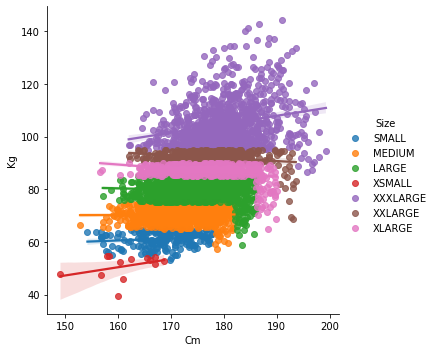

In [26]:
#weight_height_male_df.head()
sns.lmplot(data=weight_height_male_df, x="Cm", y="Kg", hue="Size", legend=True)